In [131]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [132]:
df=pd.read_csv('C:/Users/ANKIT PC/Desktop/USL EXAM/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Q1: Do the descriptive analytics and give the shape, info, describe and percentage of null values present in the dataset? Also Implement various distance techniques to find the similarity between the Ca and Fe Features which are present in the Glass dataset? (5 MARK)

In [133]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [134]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [135]:
df.shape

(214, 10)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [137]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [138]:
import scipy.spatial.distance as dist
print('Euclidean distance is:',dist.euclidean(df['Ca'],df['Fe']))
print('Manhatton distance is:',dist.cityblock(df['Ca'],df['Fe']))
print('chebyshev distance is:',dist.chebyshev(df['Ca'],df['Fe']))
print('cosine distance is:',dist.cosine(df['Ca'],df['Fe']))

Euclidean distance is: 131.82110946278672
Manhatton distance is: 1904.5900000000001
chebyshev distance is: 15.950000000000001
cosine distance is: 0.483485144954364


## Q2.1: Drop the target column (TYPE) and Perform K-means Clustering and find the optimum number of clusters using Elbow curve. Plot the clusters using any two columns of your choice. (5 marks)

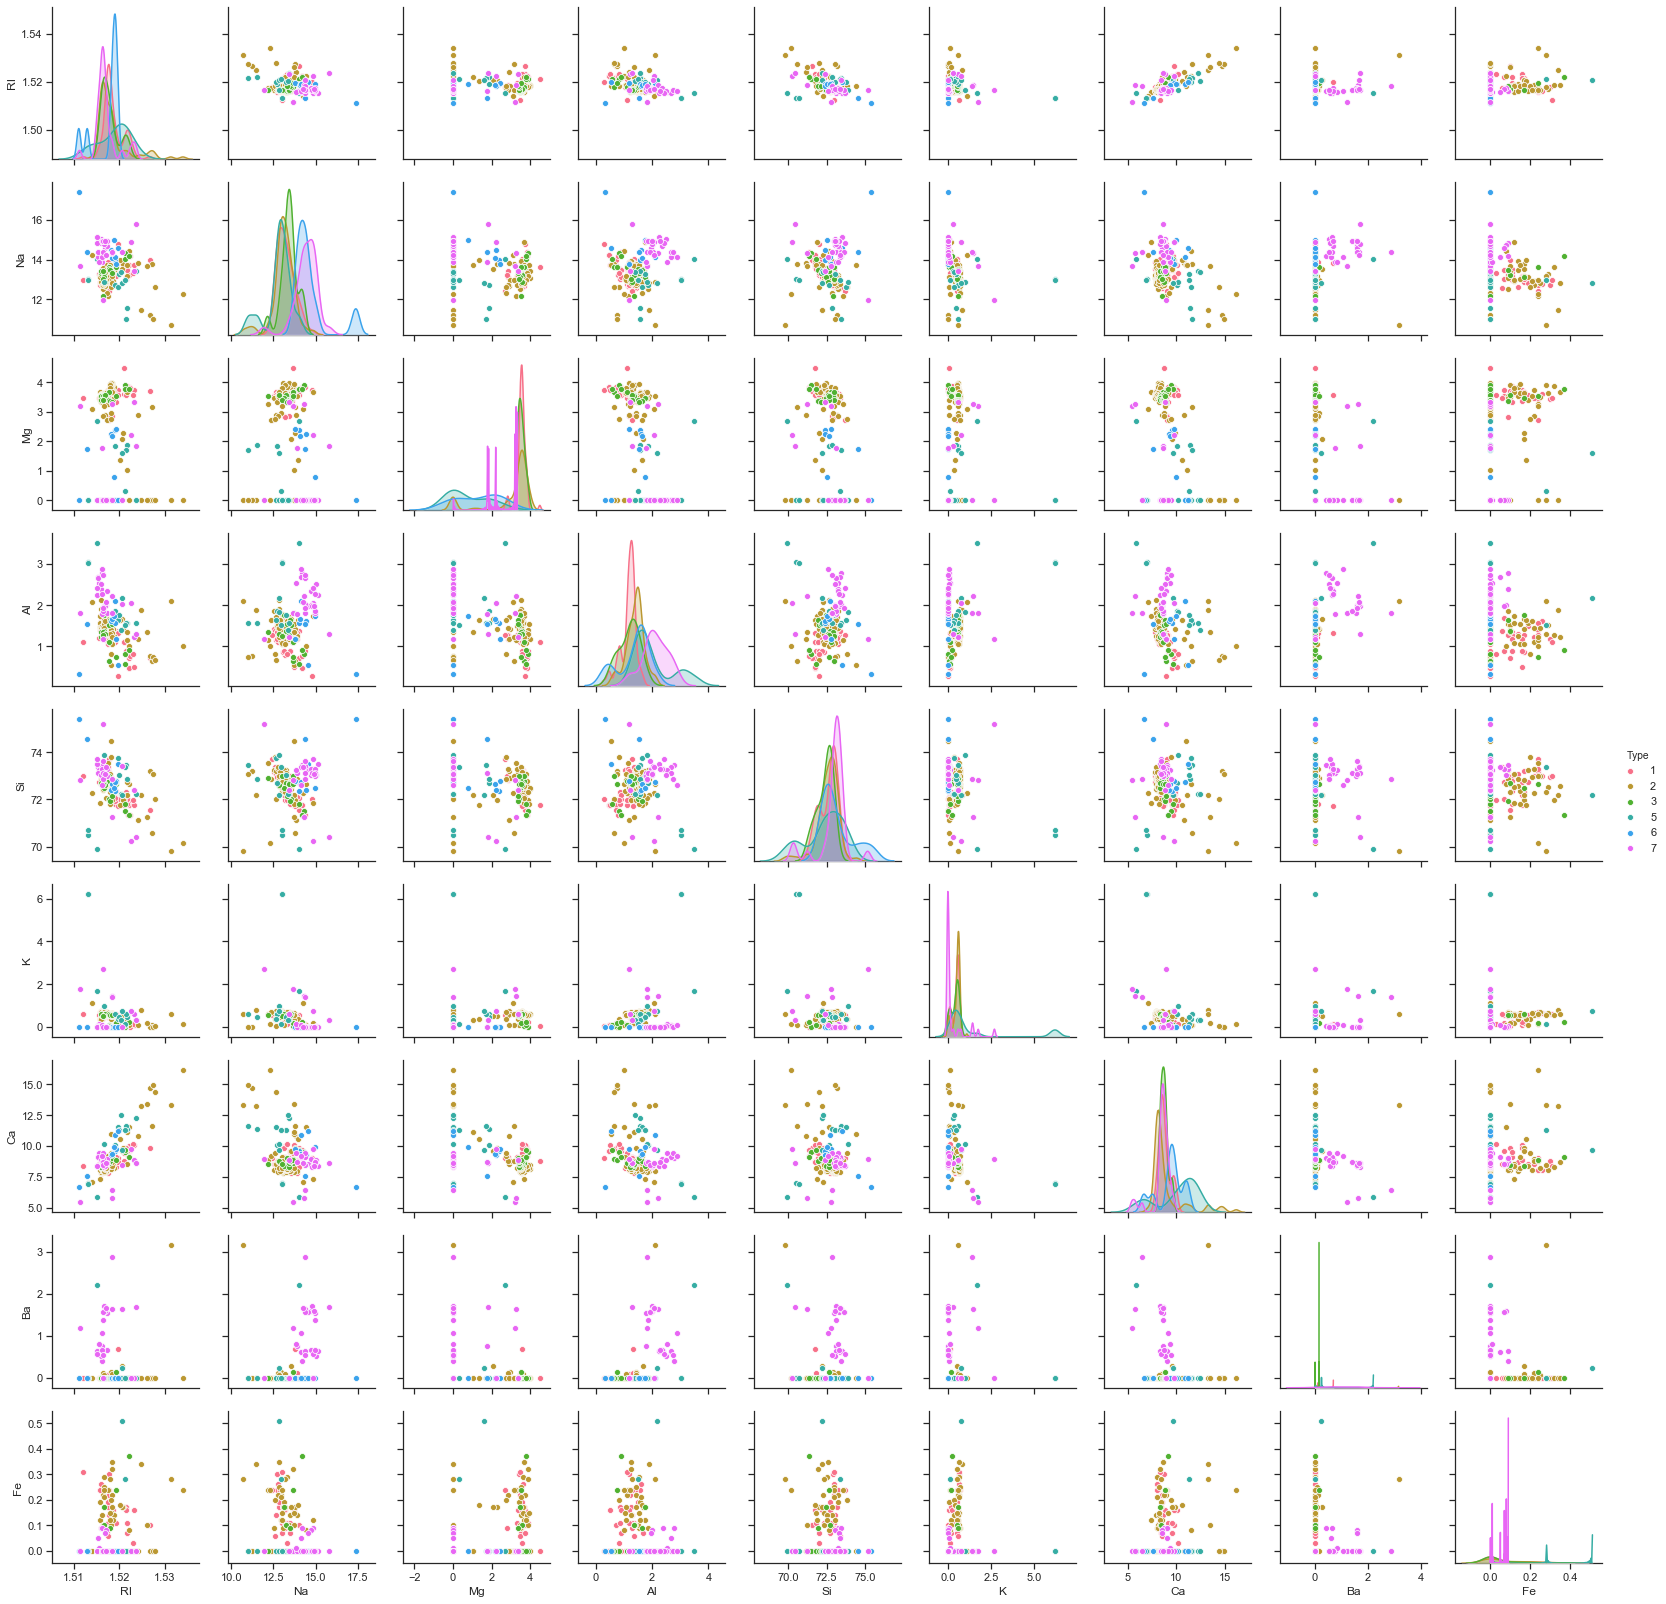

In [139]:
sns.pairplot(df, vars = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'] ,hue='Type', palette='husl')
plt.show()

In [140]:
df1=df.drop('Type',axis=1)
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [141]:
df_scaled=df1.apply(zscore)
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# finding optimal k

In [142]:
from sklearn.cluster import KMeans
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
    clusters.fit(df_scaled) ##take that clusters on scaled dataset
    labels=clusters.labels_ ## k values
    centroids= clusters.cluster_centers_ ##within that hat is centriod
    cluster_errors.append(clusters.inertia_) ##within cluster sum f squares
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]    ##calaculating errors. by default eudidian distance

,num_clusters,cluster_errors
0,1,1926.000000
1,2,1535.911255
2,3,1239.415653
3,4,1036.705132
4,5,889.771969
5,6,770.979300
6,7,682.385453
7,8,615.121257
8,9,564.051487


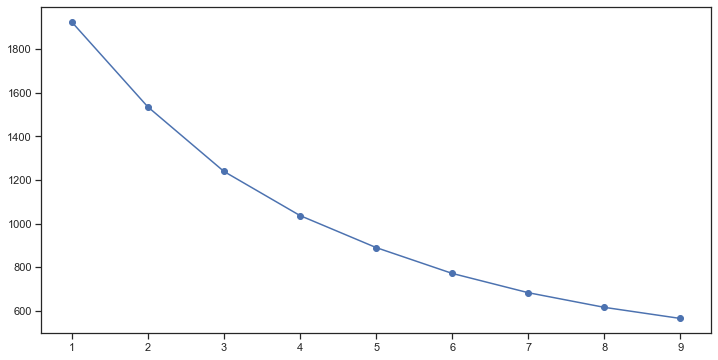

In [143]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [160]:
# Now we know our best k value is 4, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=4)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

In [161]:
K_mean.labels_

df_labels=pd.DataFrame(K_mean.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [162]:
df_labeled=df.join(df_labels)
df_labeled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0,0


In [163]:
##displaying cluster for 0 
df_labeled[df_labeled.labels==0].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            159, 160, 161, 164, 168, 176, 177, 178, 179, 201],
           dtype='int64', length=136)

In [164]:
##displaying cluster 1
df_labeled[df_labeled.labels==1].index

Int64Index([ 17,  21,  38,  39,  43,  47,  48,  50,  62,  63,  64,  65,  66,
             67,  68,  69, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            127, 128, 129, 130, 131, 151, 157, 162, 165, 166, 167, 169, 170,
            173, 174, 175, 183, 187, 188],
           dtype='int64')

In [165]:
##displaying cluster 2
df_labeled[df_labeled.labels==2].index

Int64Index([163, 180, 181, 182, 184, 185, 186, 189, 190, 191, 192, 193, 194,
            195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208,
            209, 210, 211, 212, 213],
           dtype='int64')

In [166]:
##displaying cluster 3
df_labeled[df_labeled.labels==3].index

Int64Index([171, 172], dtype='int64')

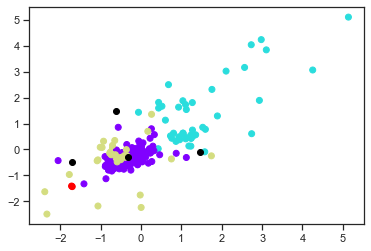

In [167]:
plt.scatter(df_scaled['RI'],df_scaled['Ca'],c=df_labeled['labels'].astype(float),cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',cmap='rainbow')
plt.show()

## Q2.2: Perform Dendogram (Find the best method to find the clusters) and find the optimum number of clusters. Plot the clusters using any two columns of your choice. (5 marks)

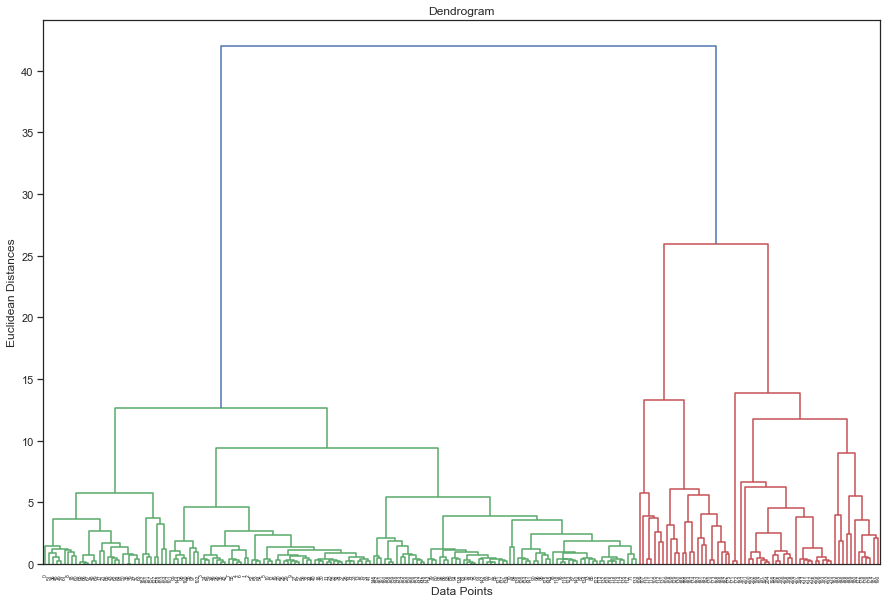

In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[15,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [169]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

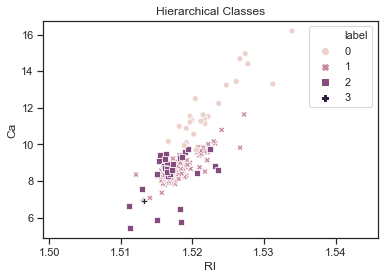

In [171]:
plt.title('Hierarchical Classes')
sns.scatterplot(x='RI', y='Ca', hue='label', style='label', data=df_h)
plt.show()

## Q3. Attach all the labels to your Data Frame (Without target) and Form 4 models of given types -

3.1 - Without PCA

3.2 – (With PCA) and find the best Principal components. State the best number of Principal Components. Give Proper reason for justification? And on the basis of your observation, give one best model among all.


In [176]:
df_k=df_labeled.drop('Type',axis=1)
df_k.head() ##labeles were attached earlier to 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


x=df_k.drop('labels',axis=1)
y=df_k['labels']
test_size = 0.30 # taking 70:30 training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [292]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_test = independent_scalar.transform (x_test) # only transform

# ## D.T

In [293]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [294]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_test)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_test, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9664429530201343
Validation Accuracy  ::  0.9384615384615385


In [295]:
print('Classification Report')
print(classification_report(y_test, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.92      0.96        13
           2       0.89      0.73      0.80        11

    accuracy                           0.94        65
   macro avg       0.94      0.88      0.91        65
weighted avg       0.94      0.94      0.94        65



# R.F

In [297]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=2,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [298]:
predictValues_validate = RFclassifier.predict(x_test)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_test, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9538461538461539


In [299]:
print('Classification Report')
print(classification_report(y_test, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.85      0.92        13
           2       1.00      0.91      0.95        11

    accuracy                           0.95        65
   macro avg       0.98      0.92      0.94        65
weighted avg       0.96      0.95      0.95        65



### KNN

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
x_standardize = x.apply(zscore)
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=test_size, random_state=seed)

KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

predictValues_validate = KNN.predict(x_test)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_test, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[0 0 0 0 1 0 0 0 0 2 2 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 2 0 0 1 1 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 2 1 0 0 0 0 0 1 0 1 2 0 0 0 0 0 2 0 1 0
 0 0 1 0 0 1 1 1 2 0 0 0 0 0 0 1 0 2 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0
 0 0 1 2 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 2
 1]
Train Accuracy  ::  0.9328859060402684
[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 2 2 0 0 0 2 1 0 0 0 2 0
 0 0 0 0 2 1 0 0 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0]
Validation Accuracy  ::  0.9076923076923077


#  gradient bosting

In [302]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=150)
gb.fit(x_train,y_train )

print("Accuracy on training set: {:.3f}".format(gb.score(x_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_train,y_train)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


# PCA

Cumulative Variance Explained [ 27.90181918  50.68039901  66.28977672  79.15491501  89.31049554
  95.17310879  99.27264705  99.98212425 100.        ]


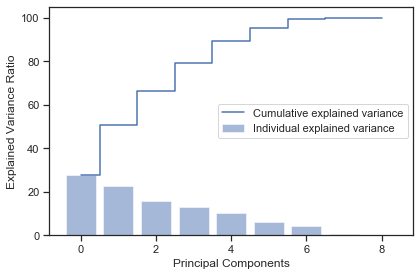

In [303]:
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(x)
cov_matrix = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [309]:
# First six principal components explain 95% of the variance in the data. The first six PCA is shown below
# The three PCA will have to be named because they represent composite of original dimensions

Text(0.5, 0.92, 'First five PCA directions')

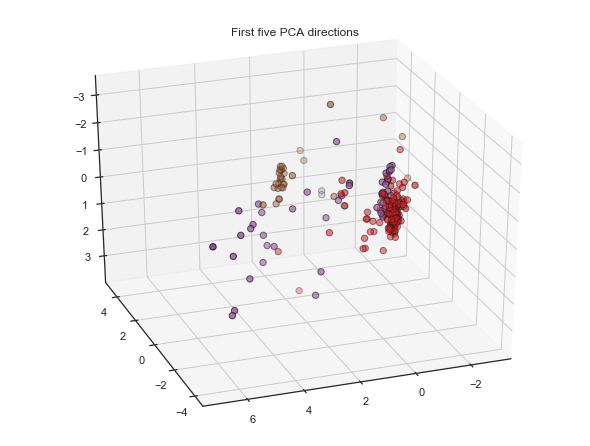

In [305]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=6).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First five PCA directions")


# PCA with decision tree

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)
pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_test)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

print('Classification Report')
print(classification_report(y_validate, predictValues_validate))


Train Accuracy  ::  0.959731543624161
Validation Accuracy  ::  0.49230769230769234
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.67      0.67        43
           1       0.25      0.21      0.23        14
           2       0.00      0.00      0.00         8

    accuracy                           0.49        65
   macro avg       0.30      0.30      0.30        65
weighted avg       0.49      0.49      0.49        65



# PCA with random forest



In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)
pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)



RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=2,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

predictValues_validate = RFclassifier.predict(x_test)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)


print('Classification Report')
print(classification_report(y_validate, predictValues_validate))


Train Accuracy  ::  1.0
Validation Accuracy  ::  0.47692307692307695
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.65      0.64        43
           1       0.25      0.21      0.23        14
           2       0.00      0.00      0.00         8

    accuracy                           0.48        65
   macro avg       0.30      0.29      0.29        65
weighted avg       0.47      0.48      0.48        65



# PCA with KNN


In [310]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)
pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
x_standardize = x.apply(zscore)
#KNN only takes array as input hence it is importanct to convert dataframe to array
# x1 = np.array(x_test)
# y1 = np.array(y)

# test_size = 0.30 # taking 70:30 training and test set
# x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=25)

KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

predictValues_validate = KNN.predict(x_test)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_test, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[0 0 1 0 1 0 1 1 1 0 0 0 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 0 1 2 0 0 0 2 1 1 0
 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 2 0 0 0 0 2 1 0 0 0 0 1 0 2 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 2 1 0 0 1 1 2 0 0 2 0 0 0 2 1 0 0 0 1
 0]
Train Accuracy  ::  0.9194630872483222
[0 0 0 0 1 1 0 0 0 2 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2
 0 0 1 0 1 2 0 1 1 0 0 0 0 2 0 0 0 1 0 0 1 0 2 1 1 2 0 0]
Validation Accuracy  ::  0.9538461538461539


# PCA with gradient boosting

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)
pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=150)
gb.fit(x_train,y_train )

print("Accuracy on training set: {:.3f}".format(gb.score(x_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_train,y_train)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


# KNN with pca gives more accurate accuracy with repect to train and test data